In [22]:
# 1. Implement time series analysis for forecasting trends and seasonality.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('E:\\Skt\\DA_Prep\\Python\\netflix.csv')

In [24]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [25]:
df.tail()

,title,genre,language,imdb_score,premiere,runtime,year
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014
582,Biggie: I Got a Story to Tell,Documentary,English,6.9,3/1/2021,97,2021


In [26]:
#column names
df.columns.values

array(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'], dtype=object)

In [27]:
#checking null values
df.isna().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [29]:
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [30]:
df.shape

(583, 7)

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
df['premiere'] = pd.to_datetime(df['premiere'])
df.set_index('premiere', inplace = True)

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

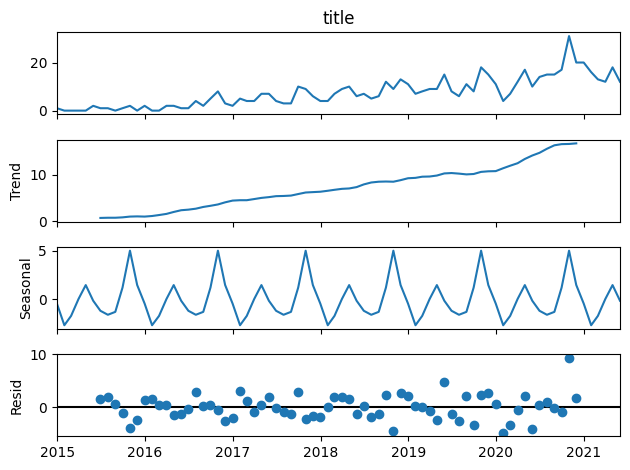

In [34]:
monthly_data = df['title'].resample('ME').count()
distribute = seasonal_decompose( monthly_data, model='additive')
distribute.plot()
plt.show()

In [35]:
model = ExponentialSmoothing (monthly_data, seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

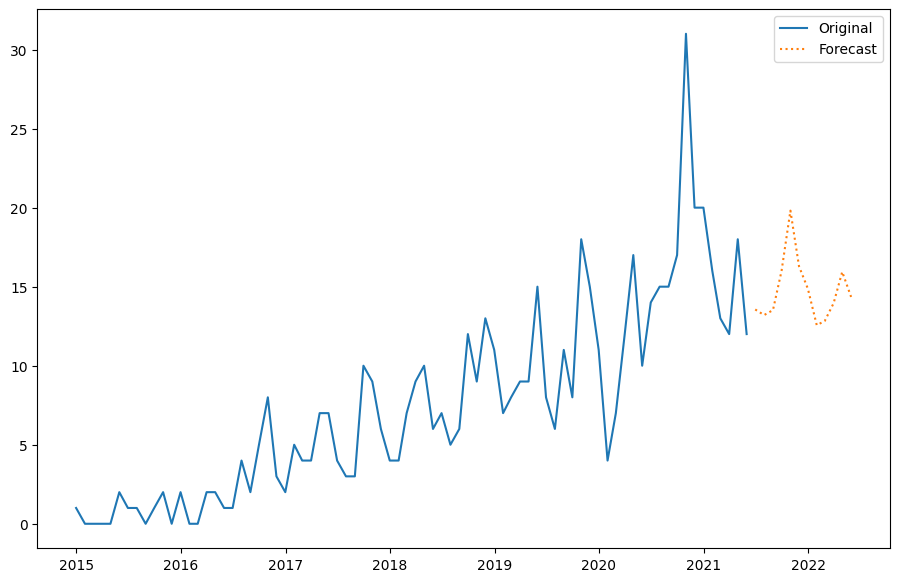

In [36]:
plt.figure(figsize=(11,7))
plt.plot(monthly_data, label='Original')
plt.plot(forecast, label='Forecast', linestyle='dotted')
plt.legend()
plt.show()

In [38]:
# 2.Perform sentiment analysis or text mining on unstructured data.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

In [41]:
df = pd.read_csv('E:\\Skt\\DA_Prep\\Python\\netflix.csv')

In [42]:
df

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014


In [43]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(title):

    scores = analyzer.polarity_scores(title)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

# apply get_sentiment function

df['sentiment'] = df['title'].apply(get_sentiment)

df

,title,genre,language,imdb_score,premiere,runtime,year,sentiment
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020,0
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018,0
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020,0
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019,1
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018,1
...,...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019,0
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020,0
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021,1
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014,0


In [58]:
# 3. Explore clustering or classification techniques for segmentation and pattern recognition.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [59]:
data = df[['year' , 'runtime']].dropna()
data

,year,runtime
0,2020,83
1,2018,95
2,2020,87
3,2019,90
4,2018,78
...,...,...
578,2019,144
579,2020,92
580,2021,102
581,2014,81


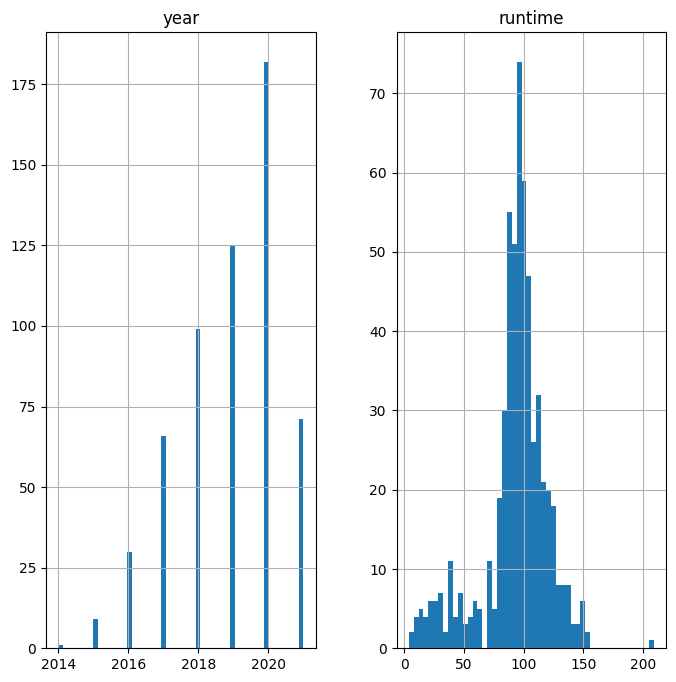

In [60]:
# Plot histograms of the featuers to visualize the data
data.hist(bins=50, figsize = (8,8))
plt.show()

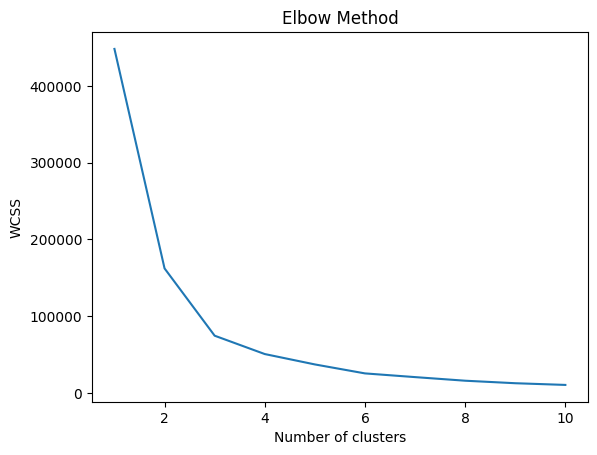

In [61]:
# Perform k-Means Clustering with values of k from 1 to 10 and plot k v/s Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [66]:
# K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
data['k_class'] = kmeans.fit_predict(data_scaled)

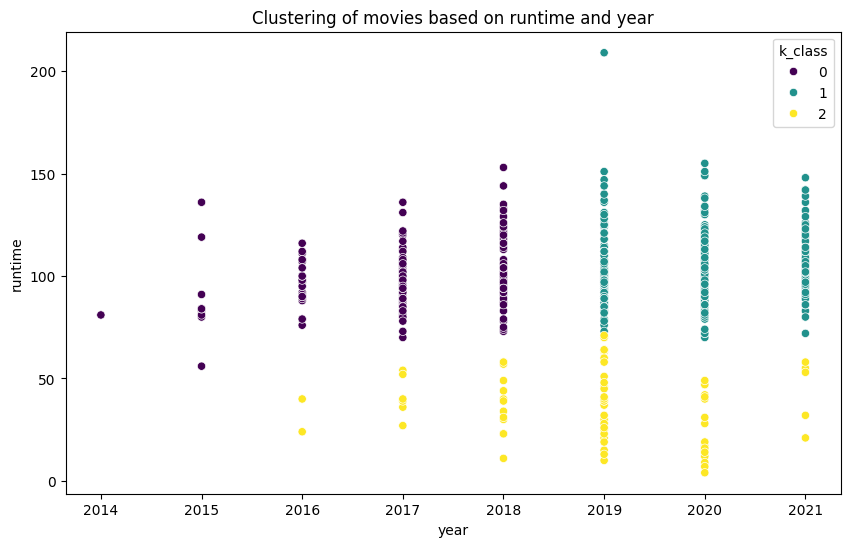

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='runtime', hue='k_class', data=data, palette='viridis')
plt.title('Clustering of movies based on runtime and year')
plt.show()